In [1]:
import pandas as pd 
import numpy as np 

import psycopg2 as pg2
import sqlalchemy
import s3fs

import julian
import datetime
import calendar
import time

import gdal
import os
import csv

import matplotlib.pyplot as plt
import matplotlib as mpl
#%matplotlib inline

import src.humble_beginnings as helper

In [22]:
lat_long_list = helper.get_meta_data()

In [23]:
station_id = list( x[0] for x in lat_long_list )
lat= list( x[1] for x in lat_long_list )
long= list( x[2] for x in lat_long_list )

In [24]:
meta_data, idi= load_metadata()

In [46]:
def make_jpg_files(idi,start=2000, end=2001):
    path_to_folder = 'pics/'
    
    for year in range(2000,2017):
        table_name= 'w_' + str(year)[-2:]
        print(f"Fetching from table {table_name}")
        
        first_day = datetime.date(year=year, day=1, month=1)
        last_day = datetime.date(year=year, day=31, month=12)
        
        rng = pd.date_range(end=last_day, start=first_day, freq='D')
        
        for day in rng:
            start = time.time()
            query_day=str(day.date())
            df = helper.get_weather_for_one_day(table_name, query_day)
            
            
            lat, long, var, precip = make_plot_lists(idi,df)
            
            path= path_to_folder + query_day + '.jpg'
            plot_tool(lat,long,var,precip, path, query_day)
            print(f'Fetched Weather Data for {query_day} in {time.time()-start:.2f} seconds!')
            
        return 'You Finished!'

Fetching from table w_00
Fetched Weather Data for 2000-01-01 in 7.92 seconds!


'You Finished!'

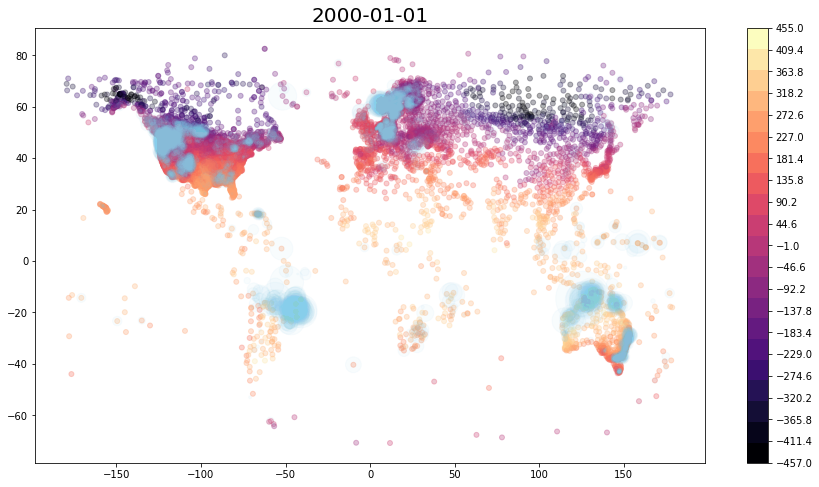

In [47]:
make_jpg_files(idi)

In [27]:
def make_plot_lists(idi,df):
    variables= []
    latitudes = []
    longitudes = []
    precips = []
    for station_index in range(0,len(df)):
        station_id, high_temp, precip = df.index[station_index][0], df.TMAX[station_index], df.PRCP[station_index]
        
        latitude = idi[station_id][0]
        longitude = idi[station_id][1]
        
        latitudes.append(latitude)
        longitudes.append(longitude)
        variables.append(high_temp)
        precips.append(precip)
        
    return latitudes, longitudes, variables, precips
    
    

In [28]:
df= helper.get_weather_for_one_day()

TypeError: get_weather_for_one_day() missing 2 required positional arguments: 'table_name' and 'day'

In [ ]:
lat, long, var, precip = make_plot_lists(idi,df)

In [ ]:
idi['AEM00041194']

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
max(var)

In [ ]:
min(var)

In [45]:
#cmap, norm = mpl.colors.from_levels_and_colors([0, 2, 5, 6], ['red', 'green', 'blue'])
def plot_tool(lat,long,var,precip,path,day):
    fig, ax = plt.subplots(figsize=(15,8))
    cmap = plt.get_cmap('magma',21)
    norm = mpl.colors.Normalize(vmin=-457,vmax=455)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ticks=np.linspace(-457,455,21)), 

    ax.scatter(long,lat, alpha=0.3, c=var, cmap=cmap,s=25,norm=norm)
    ax.scatter(long,lat, s=precip, alpha=.05, color='skyblue')
    #ax.set_ylim(20,60)
    #ax.set_xlim(-140,-50)
    ax.set_title(day, fontsize=20)
    
    fig.savefig(path)
    
    return None

In [ ]:
fig, ax = plt.subplots()
ax.scatter(long,lat, s=precip)

In [5]:
import imageio

In [18]:
def make_gif(path):
    files = sorted(os.listdir(path))
    images = []
    for file in files[1:]:
        start= time.time()
        images.append(imageio.imread(path+file))
        print(f'Appended {file} in {time.time()-start} seconds!')
    imageio.mimsave('final.gif', images, duration=.1)
    
    return None
        
        


In [19]:
make_gif('pics/')

Appended 2000-01-01.jpg in 0.3491401672363281 seconds!
Appended 2000-01-02.jpg in 0.02283000946044922 seconds!
Appended 2000-01-03.jpg in 0.0202791690826416 seconds!
Appended 2000-01-04.jpg in 0.02247905731201172 seconds!
Appended 2000-01-05.jpg in 0.02025890350341797 seconds!
Appended 2000-01-06.jpg in 0.02039480209350586 seconds!
Appended 2000-01-07.jpg in 0.020607948303222656 seconds!
Appended 2000-01-08.jpg in 0.02018594741821289 seconds!
Appended 2000-01-09.jpg in 0.020715951919555664 seconds!
Appended 2000-01-10.jpg in 0.021869182586669922 seconds!
Appended 2000-01-11.jpg in 0.029455900192260742 seconds!
Appended 2000-01-12.jpg in 0.02676677703857422 seconds!
Appended 2000-01-13.jpg in 0.026727914810180664 seconds!
Appended 2000-01-14.jpg in 0.0205230712890625 seconds!
Appended 2000-01-15.jpg in 0.020637035369873047 seconds!
Appended 2000-01-16.jpg in 0.02037501335144043 seconds!
Appended 2000-01-17.jpg in 0.02071380615234375 seconds!
Appended 2000-01-18.jpg in 0.0203251838684082

Appended 2000-05-27.jpg in 0.023043155670166016 seconds!
Appended 2000-05-28.jpg in 0.029541969299316406 seconds!
Appended 2000-05-29.jpg in 0.030716896057128906 seconds!
Appended 2000-05-30.jpg in 0.028417110443115234 seconds!
Appended 2000-05-31.jpg in 0.02554607391357422 seconds!
Appended 2000-06-01.jpg in 0.020166873931884766 seconds!
Appended 2000-06-02.jpg in 0.020200014114379883 seconds!
Appended 2000-06-03.jpg in 0.01999187469482422 seconds!
Appended 2000-06-04.jpg in 0.020521879196166992 seconds!
Appended 2000-06-05.jpg in 0.029074907302856445 seconds!
Appended 2000-06-06.jpg in 0.028773069381713867 seconds!
Appended 2000-06-07.jpg in 0.03182101249694824 seconds!
Appended 2000-06-08.jpg in 0.036064863204956055 seconds!
Appended 2000-06-09.jpg in 0.03508782386779785 seconds!
Appended 2000-06-10.jpg in 0.03319120407104492 seconds!
Appended 2000-06-11.jpg in 0.045495033264160156 seconds!
Appended 2000-06-12.jpg in 0.036763906478881836 seconds!
Appended 2000-06-13.jpg in 0.0333540

Appended 2000-10-24.jpg in 0.020542144775390625 seconds!
Appended 2000-10-25.jpg in 0.02785515785217285 seconds!
Appended 2000-10-26.jpg in 0.025617122650146484 seconds!
Appended 2000-10-27.jpg in 0.02548384666442871 seconds!
Appended 2000-10-28.jpg in 0.0229949951171875 seconds!
Appended 2000-10-29.jpg in 0.02032303810119629 seconds!
Appended 2000-10-30.jpg in 0.021255970001220703 seconds!
Appended 2000-10-31.jpg in 0.02181100845336914 seconds!
Appended 2000-11-01.jpg in 0.020660877227783203 seconds!
Appended 2000-11-02.jpg in 0.02100205421447754 seconds!
Appended 2000-11-03.jpg in 0.026387929916381836 seconds!
Appended 2000-11-04.jpg in 0.025841712951660156 seconds!
Appended 2000-11-05.jpg in 0.020762920379638672 seconds!
Appended 2000-11-06.jpg in 0.020151853561401367 seconds!
Appended 2000-11-07.jpg in 0.020413875579833984 seconds!
Appended 2000-11-08.jpg in 0.020340919494628906 seconds!
Appended 2000-11-09.jpg in 0.021863937377929688 seconds!
Appended 2000-11-10.jpg in 0.020493745

Appended 2001-03-22.jpg in 0.03144216537475586 seconds!
Appended 2001-03-23.jpg in 0.033435821533203125 seconds!
Appended 2001-03-24.jpg in 0.02459120750427246 seconds!
Appended 2001-03-25.jpg in 0.022223234176635742 seconds!
Appended 2001-03-26.jpg in 0.024205923080444336 seconds!
Appended 2001-03-27.jpg in 0.03695487976074219 seconds!
Appended 2001-03-28.jpg in 0.0367429256439209 seconds!
Appended 2001-03-29.jpg in 0.03917407989501953 seconds!
Appended 2001-03-30.jpg in 0.03970789909362793 seconds!
Appended 2001-03-31.jpg in 0.0341801643371582 seconds!
Appended 2001-04-01.jpg in 0.03191828727722168 seconds!
Appended 2001-04-02.jpg in 0.03388404846191406 seconds!
Appended 2001-04-03.jpg in 0.03282904624938965 seconds!
Appended 2001-04-04.jpg in 0.033187150955200195 seconds!
Appended 2001-04-05.jpg in 0.04669976234436035 seconds!
Appended 2001-04-06.jpg in 0.03649091720581055 seconds!
Appended 2001-04-07.jpg in 0.04767775535583496 seconds!
Appended 2001-04-08.jpg in 0.03391504287719726

Appended 2001-08-19.jpg in 0.030529022216796875 seconds!
Appended 2001-08-20.jpg in 0.027048826217651367 seconds!
Appended 2001-08-21.jpg in 0.02714085578918457 seconds!
Appended 2001-08-22.jpg in 0.02030801773071289 seconds!
Appended 2001-08-23.jpg in 0.020190954208374023 seconds!
Appended 2001-08-24.jpg in 0.020908117294311523 seconds!
Appended 2001-08-25.jpg in 0.02293682098388672 seconds!
Appended 2001-08-26.jpg in 0.03174710273742676 seconds!
Appended 2001-08-27.jpg in 0.03427886962890625 seconds!
Appended 2001-08-28.jpg in 0.035988807678222656 seconds!
Appended 2001-08-29.jpg in 0.03340601921081543 seconds!
Appended 2001-08-30.jpg in 0.035429954528808594 seconds!
Appended 2001-08-31.jpg in 0.03961300849914551 seconds!
Appended 2001-09-01.jpg in 0.03419780731201172 seconds!
Appended 2001-09-02.jpg in 0.033957719802856445 seconds!
Appended 2001-09-03.jpg in 0.03707289695739746 seconds!
Appended 2001-09-04.jpg in 0.031419992446899414 seconds!
Appended 2001-09-05.jpg in 0.03342413902

Appended 2002-01-15.jpg in 0.03589987754821777 seconds!
Appended 2002-01-16.jpg in 0.04080390930175781 seconds!
Appended 2002-01-17.jpg in 0.04285717010498047 seconds!
Appended 2002-01-18.jpg in 0.03409695625305176 seconds!
Appended 2002-01-19.jpg in 0.03428220748901367 seconds!
Appended 2002-01-20.jpg in 0.03144216537475586 seconds!
Appended 2002-01-21.jpg in 0.03335881233215332 seconds!
Appended 2002-01-22.jpg in 0.03194069862365723 seconds!
Appended 2002-01-23.jpg in 0.03394198417663574 seconds!
Appended 2002-01-24.jpg in 0.034140825271606445 seconds!
Appended 2002-01-25.jpg in 0.03279590606689453 seconds!
Appended 2002-01-26.jpg in 0.03219771385192871 seconds!
Appended 2002-01-27.jpg in 0.03287482261657715 seconds!
Appended 2002-01-28.jpg in 0.03438210487365723 seconds!
Appended 2002-01-29.jpg in 0.03177380561828613 seconds!
Appended 2002-01-30.jpg in 0.03265690803527832 seconds!
Appended 2002-01-31.jpg in 0.03591513633728027 seconds!
Appended 2002-02-01.jpg in 0.03346991539001465 

Appended 2002-06-11.jpg in 0.02301311492919922 seconds!
Appended 2002-06-12.jpg in 0.029717206954956055 seconds!
Appended 2002-06-13.jpg in 0.027938127517700195 seconds!
Appended 2002-06-14.jpg in 0.025156021118164062 seconds!
Appended 2002-06-15.jpg in 0.023988008499145508 seconds!
Appended 2002-06-16.jpg in 0.021237850189208984 seconds!
Appended 2002-06-17.jpg in 0.02306199073791504 seconds!
Appended 2002-06-18.jpg in 0.02326202392578125 seconds!
Appended 2002-06-19.jpg in 0.02581620216369629 seconds!
Appended 2002-06-20.jpg in 0.030272960662841797 seconds!
Appended 2002-06-21.jpg in 0.02722001075744629 seconds!
Appended 2002-06-22.jpg in 0.022119760513305664 seconds!
Appended 2002-06-23.jpg in 0.02376103401184082 seconds!
Appended 2002-06-24.jpg in 0.02193307876586914 seconds!
Appended 2002-06-25.jpg in 0.02522873878479004 seconds!
Appended 2002-06-26.jpg in 0.021867752075195312 seconds!
Appended 2002-06-27.jpg in 0.023303985595703125 seconds!
Appended 2002-06-28.jpg in 0.0249857902

Appended 2002-11-05.jpg in 0.03606390953063965 seconds!
Appended 2002-11-06.jpg in 0.02906513214111328 seconds!
Appended 2002-11-07.jpg in 0.023540973663330078 seconds!
Appended 2002-11-08.jpg in 0.025878190994262695 seconds!
Appended 2002-11-09.jpg in 0.02108621597290039 seconds!
Appended 2002-11-10.jpg in 0.024872779846191406 seconds!
Appended 2002-11-11.jpg in 0.021686077117919922 seconds!
Appended 2002-11-12.jpg in 0.02223825454711914 seconds!
Appended 2002-11-13.jpg in 0.02617025375366211 seconds!
Appended 2002-11-14.jpg in 0.03202986717224121 seconds!
Appended 2002-11-15.jpg in 0.02901291847229004 seconds!
Appended 2002-11-16.jpg in 0.024703025817871094 seconds!
Appended 2002-11-17.jpg in 0.026735305786132812 seconds!
Appended 2002-11-18.jpg in 0.020687103271484375 seconds!
Appended 2002-11-19.jpg in 0.02573704719543457 seconds!
Appended 2002-11-20.jpg in 0.02261519432067871 seconds!
Appended 2002-11-21.jpg in 0.027090072631835938 seconds!
Appended 2002-11-22.jpg in 0.02393388748

Appended 2003-04-04.jpg in 0.03360104560852051 seconds!
Appended 2003-04-05.jpg in 0.030410051345825195 seconds!
Appended 2003-04-06.jpg in 0.02775287628173828 seconds!
Appended 2003-04-07.jpg in 0.02117013931274414 seconds!
Appended 2003-04-08.jpg in 0.027671098709106445 seconds!
Appended 2003-04-09.jpg in 0.028633832931518555 seconds!
Appended 2003-04-10.jpg in 0.021800994873046875 seconds!
Appended 2003-04-11.jpg in 0.019814252853393555 seconds!
Appended 2003-04-12.jpg in 0.02702784538269043 seconds!
Appended 2003-04-13.jpg in 0.03567004203796387 seconds!
Appended 2003-04-14.jpg in 0.022663116455078125 seconds!
Appended 2003-04-15.jpg in 0.024967193603515625 seconds!
Appended 2003-04-16.jpg in 0.02058887481689453 seconds!
Appended 2003-04-17.jpg in 0.02551412582397461 seconds!
Appended 2003-04-18.jpg in 0.02059793472290039 seconds!
Appended 2003-04-19.jpg in 0.024294137954711914 seconds!
Appended 2003-04-20.jpg in 0.03258991241455078 seconds!
Appended 2003-04-21.jpg in 0.03547215461

Appended 2003-08-30.jpg in 0.029530048370361328 seconds!
Appended 2003-08-31.jpg in 0.03676319122314453 seconds!
Appended 2003-09-01.jpg in 0.03404974937438965 seconds!
Appended 2003-09-02.jpg in 0.02065300941467285 seconds!
Appended 2003-09-03.jpg in 0.02103281021118164 seconds!
Appended 2003-09-04.jpg in 0.023618221282958984 seconds!
Appended 2003-09-05.jpg in 0.025406837463378906 seconds!
Appended 2003-09-06.jpg in 0.026797056198120117 seconds!
Appended 2003-09-07.jpg in 0.028013944625854492 seconds!
Appended 2003-09-08.jpg in 0.03607916831970215 seconds!
Appended 2003-09-09.jpg in 0.025074005126953125 seconds!
Appended 2003-09-10.jpg in 0.021260976791381836 seconds!
Appended 2003-09-11.jpg in 0.024837970733642578 seconds!
Appended 2003-09-12.jpg in 0.02284693717956543 seconds!
Appended 2003-09-13.jpg in 0.024869918823242188 seconds!
Appended 2003-09-14.jpg in 0.021033048629760742 seconds!
Appended 2003-09-15.jpg in 0.025133132934570312 seconds!
Appended 2003-09-16.jpg in 0.03376793

Appended 2004-01-23.jpg in 0.026285171508789062 seconds!
Appended 2004-01-24.jpg in 0.028567075729370117 seconds!
Appended 2004-01-25.jpg in 0.034803152084350586 seconds!
Appended 2004-01-26.jpg in 0.021528005599975586 seconds!
Appended 2004-01-27.jpg in 0.025411128997802734 seconds!
Appended 2004-01-28.jpg in 0.020744800567626953 seconds!
Appended 2004-01-29.jpg in 0.025027036666870117 seconds!
Appended 2004-01-30.jpg in 0.02113509178161621 seconds!
Appended 2004-01-31.jpg in 0.023724079132080078 seconds!
Appended 2004-02-01.jpg in 0.037214040756225586 seconds!
Appended 2004-02-02.jpg in 0.023869991302490234 seconds!
Appended 2004-02-03.jpg in 0.026559114456176758 seconds!
Appended 2004-02-04.jpg in 0.025522947311401367 seconds!
Appended 2004-02-05.jpg in 0.03378605842590332 seconds!
Appended 2004-02-06.jpg in 0.031707048416137695 seconds!
Appended 2004-02-07.jpg in 0.09242486953735352 seconds!
Appended 2004-02-08.jpg in 0.05967092514038086 seconds!
Appended 2004-02-09.jpg in 0.034318

Appended 2004-06-17.jpg in 0.040804147720336914 seconds!
Appended 2004-06-18.jpg in 0.055853843688964844 seconds!
Appended 2004-06-19.jpg in 0.05766010284423828 seconds!
Appended 2004-06-20.jpg in 0.06572914123535156 seconds!
Appended 2004-06-21.jpg in 0.06133294105529785 seconds!
Appended 2004-06-22.jpg in 0.048256874084472656 seconds!
Appended 2004-06-23.jpg in 0.044318199157714844 seconds!
Appended 2004-06-24.jpg in 0.04192781448364258 seconds!
Appended 2004-06-25.jpg in 0.038053035736083984 seconds!
Appended 2004-06-26.jpg in 0.04645490646362305 seconds!
Appended 2004-06-27.jpg in 0.07441997528076172 seconds!
Appended 2004-06-28.jpg in 0.09173464775085449 seconds!
Appended 2004-06-29.jpg in 0.062342166900634766 seconds!
Appended 2004-06-30.jpg in 0.05192708969116211 seconds!
Appended 2004-07-01.jpg in 0.042487144470214844 seconds!
Appended 2004-07-02.jpg in 0.3301689624786377 seconds!
Appended 2004-07-03.jpg in 0.14320111274719238 seconds!
Appended 2004-07-04.jpg in 0.0476028919219

Appended 2004-11-12.jpg in 0.027593135833740234 seconds!
Appended 2004-11-13.jpg in 0.02637791633605957 seconds!
Appended 2004-11-14.jpg in 0.025672197341918945 seconds!
Appended 2004-11-15.jpg in 0.02643299102783203 seconds!
Appended 2004-11-16.jpg in 0.030038118362426758 seconds!
Appended 2004-11-17.jpg in 0.03270125389099121 seconds!
Appended 2004-11-18.jpg in 0.03646206855773926 seconds!
Appended 2004-11-19.jpg in 0.03834795951843262 seconds!
Appended 2004-11-20.jpg in 0.02483201026916504 seconds!
Appended 2004-11-21.jpg in 0.023977994918823242 seconds!
Appended 2004-11-22.jpg in 0.026150226593017578 seconds!
Appended 2004-11-23.jpg in 0.026873111724853516 seconds!
Appended 2004-11-24.jpg in 0.03186798095703125 seconds!
Appended 2004-11-25.jpg in 0.028537750244140625 seconds!
Appended 2004-11-26.jpg in 0.03046703338623047 seconds!
Appended 2004-11-27.jpg in 0.03690505027770996 seconds!
Appended 2004-11-28.jpg in 0.0298919677734375 seconds!
Appended 2004-11-29.jpg in 0.0557620525360

Appended 2005-04-07.jpg in 0.03177976608276367 seconds!
Appended 2005-04-08.jpg in 0.033766984939575195 seconds!
Appended 2005-04-09.jpg in 0.030879974365234375 seconds!
Appended 2005-04-10.jpg in 0.02959275245666504 seconds!
Appended 2005-04-11.jpg in 0.030694961547851562 seconds!
Appended 2005-04-12.jpg in 0.038796186447143555 seconds!
Appended 2005-04-13.jpg in 0.024619102478027344 seconds!
Appended 2005-04-14.jpg in 0.02918410301208496 seconds!
Appended 2005-04-15.jpg in 0.024520158767700195 seconds!
Appended 2005-04-16.jpg in 0.026180028915405273 seconds!
Appended 2005-04-17.jpg in 0.025858163833618164 seconds!
Appended 2005-04-18.jpg in 0.022320985794067383 seconds!
Appended 2005-04-19.jpg in 0.02636098861694336 seconds!
Appended 2005-04-20.jpg in 0.022101879119873047 seconds!
Appended 2005-04-21.jpg in 0.0260770320892334 seconds!
Appended 2005-04-22.jpg in 0.03565812110900879 seconds!
Appended 2005-04-23.jpg in 0.03266286849975586 seconds!
Appended 2005-04-24.jpg in 0.0403809547

Appended 2005-09-03.jpg in 0.027019023895263672 seconds!
Appended 2005-09-04.jpg in 0.027209997177124023 seconds!
Appended 2005-09-05.jpg in 0.0281982421875 seconds!
Appended 2005-09-06.jpg in 0.0219419002532959 seconds!
Appended 2005-09-07.jpg in 0.030269861221313477 seconds!
Appended 2005-09-08.jpg in 0.028448104858398438 seconds!
Appended 2005-09-09.jpg in 0.03169822692871094 seconds!
Appended 2005-09-10.jpg in 0.024663209915161133 seconds!
Appended 2005-09-11.jpg in 0.03196001052856445 seconds!
Appended 2005-09-12.jpg in 0.03160667419433594 seconds!
Appended 2005-09-13.jpg in 0.027362823486328125 seconds!
Appended 2005-09-14.jpg in 0.030129194259643555 seconds!
Appended 2005-09-15.jpg in 0.030681133270263672 seconds!
Appended 2005-09-16.jpg in 0.03288602828979492 seconds!
Appended 2005-09-17.jpg in 0.0235440731048584 seconds!
Appended 2005-09-18.jpg in 0.026749134063720703 seconds!
Appended 2005-09-19.jpg in 0.024955034255981445 seconds!
Appended 2005-09-20.jpg in 0.032369136810302

Appended 2006-01-29.jpg in 0.027807950973510742 seconds!
Appended 2006-01-30.jpg in 0.026202678680419922 seconds!
Appended 2006-01-31.jpg in 0.023463964462280273 seconds!
Appended 2006-02-01.jpg in 0.026662826538085938 seconds!
Appended 2006-02-02.jpg in 0.0300900936126709 seconds!
Appended 2006-02-03.jpg in 0.03770875930786133 seconds!
Appended 2006-02-04.jpg in 0.03934597969055176 seconds!
Appended 2006-02-05.jpg in 0.0494379997253418 seconds!
Appended 2006-02-06.jpg in 0.0468752384185791 seconds!
Appended 2006-02-07.jpg in 0.04031515121459961 seconds!
Appended 2006-02-08.jpg in 0.023823022842407227 seconds!
Appended 2006-02-09.jpg in 0.02226996421813965 seconds!
Appended 2006-02-10.jpg in 0.026459932327270508 seconds!
Appended 2006-02-11.jpg in 0.021944046020507812 seconds!
Appended 2006-02-12.jpg in 0.027205944061279297 seconds!
Appended 2006-02-13.jpg in 0.024075031280517578 seconds!
Appended 2006-02-14.jpg in 0.025702953338623047 seconds!
Appended 2006-02-15.jpg in 0.025058746337

Appended 2006-06-24.jpg in 0.03945183753967285 seconds!
Appended 2006-06-25.jpg in 0.04717588424682617 seconds!
Appended 2006-06-26.jpg in 0.058500051498413086 seconds!
Appended 2006-06-27.jpg in 0.04387712478637695 seconds!
Appended 2006-06-28.jpg in 0.04653596878051758 seconds!
Appended 2006-06-29.jpg in 0.042471885681152344 seconds!
Appended 2006-06-30.jpg in 0.05598092079162598 seconds!
Appended 2006-07-01.jpg in 0.13866710662841797 seconds!
Appended 2006-07-02.jpg in 0.0967857837677002 seconds!
Appended 2006-07-03.jpg in 0.04704713821411133 seconds!
Appended 2006-07-04.jpg in 0.03438067436218262 seconds!
Appended 2006-07-05.jpg in 0.04403209686279297 seconds!
Appended 2006-07-06.jpg in 0.0236508846282959 seconds!
Appended 2006-07-07.jpg in 0.02731490135192871 seconds!
Appended 2006-07-08.jpg in 0.08168482780456543 seconds!
Appended 2006-07-09.jpg in 0.046896934509277344 seconds!
Appended 2006-07-10.jpg in 0.05480194091796875 seconds!
Appended 2006-07-11.jpg in 0.09465289115905762 

Appended 2006-11-18.jpg in 0.07791996002197266 seconds!
Appended 2006-11-19.jpg in 0.05802798271179199 seconds!
Appended 2006-11-20.jpg in 0.055593013763427734 seconds!
Appended 2006-11-21.jpg in 0.042886972427368164 seconds!
Appended 2006-11-22.jpg in 0.04807114601135254 seconds!
Appended 2006-11-23.jpg in 0.05956721305847168 seconds!
Appended 2006-11-24.jpg in 0.03946375846862793 seconds!
Appended 2006-11-25.jpg in 0.045105934143066406 seconds!
Appended 2006-11-26.jpg in 0.0430600643157959 seconds!
Appended 2006-11-27.jpg in 0.04980587959289551 seconds!
Appended 2006-11-28.jpg in 0.05656790733337402 seconds!
Appended 2006-11-29.jpg in 0.054171085357666016 seconds!
Appended 2006-11-30.jpg in 0.04391980171203613 seconds!
Appended 2006-12-01.jpg in 0.05348801612854004 seconds!
Appended 2006-12-02.jpg in 0.04828023910522461 seconds!
Appended 2006-12-03.jpg in 0.04622912406921387 seconds!
Appended 2006-12-04.jpg in 0.025272846221923828 seconds!
Appended 2006-12-05.jpg in 0.031548261642456

Appended 2007-04-14.jpg in 0.05434918403625488 seconds!
Appended 2007-04-15.jpg in 0.065399169921875 seconds!
Appended 2007-04-16.jpg in 0.03893399238586426 seconds!
Appended 2007-04-17.jpg in 0.06345701217651367 seconds!
Appended 2007-04-18.jpg in 0.02984929084777832 seconds!
Appended 2007-04-19.jpg in 0.04660511016845703 seconds!
Appended 2007-04-20.jpg in 0.06217598915100098 seconds!
Appended 2007-04-21.jpg in 0.08828496932983398 seconds!
Appended 2007-04-22.jpg in 0.053810834884643555 seconds!
Appended 2007-04-23.jpg in 0.05327582359313965 seconds!
Appended 2007-04-24.jpg in 0.027424097061157227 seconds!
Appended 2007-04-25.jpg in 0.036132097244262695 seconds!
Appended 2007-04-26.jpg in 0.02614617347717285 seconds!
Appended 2007-04-27.jpg in 0.026211977005004883 seconds!
Appended 2007-04-28.jpg in 0.021650075912475586 seconds!
Appended 2007-04-29.jpg in 0.025902986526489258 seconds!
Appended 2007-04-30.jpg in 0.02757406234741211 seconds!
Appended 2007-05-01.jpg in 0.023383140563964

Appended 2007-09-13.jpg in 0.02663898468017578 seconds!
Appended 2007-09-14.jpg in 0.03397178649902344 seconds!
Appended 2007-09-15.jpg in 0.03293919563293457 seconds!
Appended 2007-09-16.jpg in 0.027491092681884766 seconds!
Appended 2007-09-17.jpg in 0.02638387680053711 seconds!
Appended 2007-09-18.jpg in 0.023955106735229492 seconds!
Appended 2007-09-19.jpg in 0.026506900787353516 seconds!
Appended 2007-09-20.jpg in 0.025448322296142578 seconds!
Appended 2007-09-21.jpg in 0.0370640754699707 seconds!
Appended 2007-09-22.jpg in 0.02731013298034668 seconds!
Appended 2007-09-23.jpg in 0.026032209396362305 seconds!
Appended 2007-09-24.jpg in 0.025094985961914062 seconds!
Appended 2007-09-25.jpg in 0.02151203155517578 seconds!
Appended 2007-09-26.jpg in 0.028815031051635742 seconds!
Appended 2007-09-27.jpg in 0.022981882095336914 seconds!
Appended 2007-09-28.jpg in 0.023653030395507812 seconds!
Appended 2007-09-29.jpg in 0.023616790771484375 seconds!
Appended 2007-09-30.jpg in 0.0329802036

Appended 2008-02-06.jpg in 0.03142189979553223 seconds!
Appended 2008-02-07.jpg in 0.033184051513671875 seconds!
Appended 2008-02-08.jpg in 0.03282880783081055 seconds!
Appended 2008-02-09.jpg in 0.02963113784790039 seconds!
Appended 2008-02-10.jpg in 0.02806711196899414 seconds!
Appended 2008-02-11.jpg in 0.025662899017333984 seconds!
Appended 2008-02-12.jpg in 0.22998619079589844 seconds!
Appended 2008-02-13.jpg in 0.17078590393066406 seconds!
Appended 2008-02-14.jpg in 0.06595587730407715 seconds!
Appended 2008-02-15.jpg in 0.04173016548156738 seconds!
Appended 2008-02-16.jpg in 0.03617095947265625 seconds!
Appended 2008-02-17.jpg in 0.04175591468811035 seconds!
Appended 2008-02-18.jpg in 0.02738785743713379 seconds!
Appended 2008-02-19.jpg in 0.036216020584106445 seconds!
Appended 2008-02-20.jpg in 0.03268790245056152 seconds!
Appended 2008-02-21.jpg in 0.03357386589050293 seconds!
Appended 2008-02-22.jpg in 0.031508445739746094 seconds!
Appended 2008-02-23.jpg in 0.032986879348754

Appended 2008-07-04.jpg in 0.06722116470336914 seconds!
Appended 2008-07-05.jpg in 0.03957986831665039 seconds!
Appended 2008-07-06.jpg in 0.03706502914428711 seconds!
Appended 2008-07-07.jpg in 0.08493900299072266 seconds!
Appended 2008-07-08.jpg in 0.055579185485839844 seconds!
Appended 2008-07-09.jpg in 0.04574704170227051 seconds!
Appended 2008-07-10.jpg in 0.032144784927368164 seconds!
Appended 2008-07-11.jpg in 0.0386502742767334 seconds!
Appended 2008-07-12.jpg in 0.028013229370117188 seconds!
Appended 2008-07-13.jpg in 0.03035712242126465 seconds!
Appended 2008-07-14.jpg in 0.04274582862854004 seconds!
Appended 2008-07-15.jpg in 0.05730700492858887 seconds!
Appended 2008-07-16.jpg in 0.041140079498291016 seconds!
Appended 2008-07-17.jpg in 0.03389906883239746 seconds!
Appended 2008-07-18.jpg in 0.03965902328491211 seconds!
Appended 2008-07-19.jpg in 0.0363461971282959 seconds!
Appended 2008-07-20.jpg in 0.04123497009277344 seconds!
Appended 2008-07-21.jpg in 0.05354094505310058

Appended 2008-12-01.jpg in 0.027662992477416992 seconds!
Appended 2008-12-02.jpg in 0.025168180465698242 seconds!
Appended 2008-12-03.jpg in 0.034709930419921875 seconds!
Appended 2008-12-04.jpg in 0.023374080657958984 seconds!
Appended 2008-12-05.jpg in 0.030779123306274414 seconds!
Appended 2008-12-06.jpg in 0.02156209945678711 seconds!
Appended 2008-12-07.jpg in 0.024811983108520508 seconds!
Appended 2008-12-08.jpg in 0.029446840286254883 seconds!
Appended 2008-12-09.jpg in 0.02668023109436035 seconds!
Appended 2008-12-10.jpg in 0.029742956161499023 seconds!
Appended 2008-12-11.jpg in 0.027891159057617188 seconds!
Appended 2008-12-12.jpg in 0.026342153549194336 seconds!
Appended 2008-12-13.jpg in 0.027144193649291992 seconds!
Appended 2008-12-14.jpg in 0.024808883666992188 seconds!
Appended 2008-12-15.jpg in 0.03719496726989746 seconds!
Appended 2008-12-16.jpg in 0.03452014923095703 seconds!
Appended 2008-12-17.jpg in 0.03414201736450195 seconds!
Appended 2008-12-18.jpg in 0.0288679

Appended 2009-04-30.jpg in 0.03443002700805664 seconds!
Appended 2009-05-01.jpg in 0.028939008712768555 seconds!
Appended 2009-05-02.jpg in 0.02741408348083496 seconds!
Appended 2009-05-03.jpg in 0.02510213851928711 seconds!
Appended 2009-05-04.jpg in 0.02302384376525879 seconds!
Appended 2009-05-05.jpg in 0.022554874420166016 seconds!
Appended 2009-05-06.jpg in 0.025669097900390625 seconds!
Appended 2009-05-07.jpg in 0.0208890438079834 seconds!
Appended 2009-05-08.jpg in 0.027343273162841797 seconds!
Appended 2009-05-09.jpg in 0.03071117401123047 seconds!
Appended 2009-05-10.jpg in 0.028280973434448242 seconds!
Appended 2009-05-11.jpg in 0.02128291130065918 seconds!
Appended 2009-05-12.jpg in 0.025694847106933594 seconds!
Appended 2009-05-13.jpg in 0.021265029907226562 seconds!
Appended 2009-05-14.jpg in 0.026226043701171875 seconds!
Appended 2009-05-15.jpg in 0.023178815841674805 seconds!
Appended 2009-05-16.jpg in 0.025437116622924805 seconds!
Appended 2009-05-17.jpg in 0.0296540260

Appended 2009-09-23.jpg in 0.030339956283569336 seconds!
Appended 2009-09-24.jpg in 0.037429094314575195 seconds!
Appended 2009-09-25.jpg in 0.023487091064453125 seconds!
Appended 2009-09-26.jpg in 0.025295734405517578 seconds!
Appended 2009-09-27.jpg in 0.022017955780029297 seconds!
Appended 2009-09-28.jpg in 0.02233600616455078 seconds!
Appended 2009-09-29.jpg in 0.02162003517150879 seconds!
Appended 2009-09-30.jpg in 0.02313995361328125 seconds!
Appended 2009-10-01.jpg in 0.02059316635131836 seconds!
Appended 2009-10-02.jpg in 0.026456117630004883 seconds!
Appended 2009-10-03.jpg in 0.02730083465576172 seconds!
Appended 2009-10-04.jpg in 0.024007081985473633 seconds!
Appended 2009-10-05.jpg in 0.02244877815246582 seconds!
Appended 2009-10-06.jpg in 0.02341771125793457 seconds!
Appended 2009-10-07.jpg in 0.022229909896850586 seconds!
Appended 2009-10-08.jpg in 0.022574901580810547 seconds!
Appended 2009-10-09.jpg in 0.025080204010009766 seconds!
Appended 2009-10-10.jpg in 0.021727085

Appended 2010-02-15.jpg in 0.03305482864379883 seconds!
Appended 2010-02-16.jpg in 0.04750418663024902 seconds!
Appended 2010-02-17.jpg in 0.034729957580566406 seconds!
Appended 2010-02-18.jpg in 0.030974149703979492 seconds!
Appended 2010-02-19.jpg in 0.03114795684814453 seconds!
Appended 2010-02-20.jpg in 0.030239105224609375 seconds!
Appended 2010-02-21.jpg in 0.03557991981506348 seconds!
Appended 2010-02-22.jpg in 0.04097318649291992 seconds!
Appended 2010-02-23.jpg in 0.02740621566772461 seconds!
Appended 2010-02-24.jpg in 0.026027917861938477 seconds!
Appended 2010-02-25.jpg in 0.021541118621826172 seconds!
Appended 2010-02-26.jpg in 0.02702617645263672 seconds!
Appended 2010-02-27.jpg in 0.021765947341918945 seconds!
Appended 2010-02-28.jpg in 0.07260704040527344 seconds!
Appended 2010-03-01.jpg in 0.03402400016784668 seconds!
Appended 2010-03-02.jpg in 0.029890060424804688 seconds!
Appended 2010-03-03.jpg in 0.02141404151916504 seconds!
Appended 2010-03-04.jpg in 0.024392843246

Appended 2010-07-15.jpg in 0.03615689277648926 seconds!
Appended 2010-07-16.jpg in 0.04375100135803223 seconds!
Appended 2010-07-17.jpg in 0.03722095489501953 seconds!
Appended 2010-07-18.jpg in 0.03201103210449219 seconds!
Appended 2010-07-19.jpg in 0.04295516014099121 seconds!
Appended 2010-07-20.jpg in 0.03915905952453613 seconds!
Appended 2010-07-21.jpg in 0.035366058349609375 seconds!
Appended 2010-07-22.jpg in 0.04384160041809082 seconds!
Appended 2010-07-23.jpg in 0.03712201118469238 seconds!
Appended 2010-07-24.jpg in 0.03310084342956543 seconds!
Appended 2010-07-25.jpg in 0.03776812553405762 seconds!
Appended 2010-07-26.jpg in 0.04334425926208496 seconds!
Appended 2010-07-27.jpg in 0.05196213722229004 seconds!
Appended 2010-07-28.jpg in 0.037377119064331055 seconds!
Appended 2010-07-29.jpg in 0.043263912200927734 seconds!
Appended 2010-07-30.jpg in 0.04800081253051758 seconds!
Appended 2010-07-31.jpg in 0.05288505554199219 seconds!
Appended 2010-08-01.jpg in 0.0644979476928711

Appended 2010-12-13.jpg in 0.02431178092956543 seconds!
Appended 2010-12-14.jpg in 0.03515219688415527 seconds!
Appended 2010-12-15.jpg in 0.038700103759765625 seconds!
Appended 2010-12-16.jpg in 0.023967981338500977 seconds!
Appended 2010-12-17.jpg in 0.02984023094177246 seconds!
Appended 2010-12-18.jpg in 0.03700399398803711 seconds!
Appended 2010-12-19.jpg in 0.03231096267700195 seconds!
Appended 2010-12-20.jpg in 0.04223179817199707 seconds!
Appended 2010-12-21.jpg in 0.042120933532714844 seconds!
Appended 2010-12-22.jpg in 0.025408029556274414 seconds!
Appended 2010-12-23.jpg in 0.02649712562561035 seconds!
Appended 2010-12-24.jpg in 0.0221710205078125 seconds!
Appended 2010-12-25.jpg in 0.03270411491394043 seconds!
Appended 2010-12-26.jpg in 0.047650814056396484 seconds!
Appended 2010-12-27.jpg in 0.035247087478637695 seconds!
Appended 2010-12-28.jpg in 0.030716896057128906 seconds!
Appended 2010-12-29.jpg in 0.03274822235107422 seconds!
Appended 2010-12-30.jpg in 0.0346419811248

Appended 2011-05-15.jpg in 0.03157305717468262 seconds!
Appended 2011-05-16.jpg in 0.03821206092834473 seconds!
Appended 2011-05-17.jpg in 0.029930830001831055 seconds!
Appended 2011-05-18.jpg in 0.026764631271362305 seconds!
Appended 2011-05-19.jpg in 0.021161794662475586 seconds!
Appended 2011-05-20.jpg in 0.026546001434326172 seconds!
Appended 2011-05-21.jpg in 0.023970842361450195 seconds!
Appended 2011-05-22.jpg in 0.027505874633789062 seconds!
Appended 2011-05-23.jpg in 0.027824878692626953 seconds!
Appended 2011-05-24.jpg in 0.02312493324279785 seconds!
Appended 2011-05-25.jpg in 0.027009010314941406 seconds!
Appended 2011-05-26.jpg in 0.02466106414794922 seconds!
Appended 2011-05-27.jpg in 0.02435469627380371 seconds!
Appended 2011-05-28.jpg in 0.022665977478027344 seconds!
Appended 2011-05-29.jpg in 0.02414107322692871 seconds!
Appended 2011-05-30.jpg in 0.02573108673095703 seconds!
Appended 2011-05-31.jpg in 0.024041414260864258 seconds!
Appended 2011-06-01.jpg in 0.029318332

Appended 2011-10-13.jpg in 0.0346369743347168 seconds!
Appended 2011-10-14.jpg in 0.0332491397857666 seconds!
Appended 2011-10-15.jpg in 0.03451991081237793 seconds!
Appended 2011-10-16.jpg in 0.025205135345458984 seconds!
Appended 2011-10-17.jpg in 0.025175094604492188 seconds!
Appended 2011-10-18.jpg in 0.028378725051879883 seconds!
Appended 2011-10-19.jpg in 0.02506089210510254 seconds!
Appended 2011-10-20.jpg in 0.02759385108947754 seconds!
Appended 2011-10-21.jpg in 0.03452301025390625 seconds!
Appended 2011-10-22.jpg in 0.029150009155273438 seconds!
Appended 2011-10-23.jpg in 0.03469491004943848 seconds!
Appended 2011-10-24.jpg in 0.02579808235168457 seconds!
Appended 2011-10-25.jpg in 0.022510051727294922 seconds!
Appended 2011-10-26.jpg in 0.024550914764404297 seconds!
Appended 2011-10-27.jpg in 0.024562835693359375 seconds!
Appended 2011-10-28.jpg in 0.029010772705078125 seconds!
Appended 2011-10-29.jpg in 0.02861809730529785 seconds!
Appended 2011-10-30.jpg in 0.0250098705291

Appended 2012-03-07.jpg in 0.0311431884765625 seconds!
Appended 2012-03-08.jpg in 0.04181671142578125 seconds!
Appended 2012-03-09.jpg in 0.02600717544555664 seconds!
Appended 2012-03-10.jpg in 0.027831077575683594 seconds!
Appended 2012-03-11.jpg in 0.02176213264465332 seconds!
Appended 2012-03-12.jpg in 0.022474050521850586 seconds!
Appended 2012-03-13.jpg in 0.024898767471313477 seconds!
Appended 2012-03-14.jpg in 0.024693012237548828 seconds!
Appended 2012-03-15.jpg in 0.02969503402709961 seconds!
Appended 2012-03-16.jpg in 0.031429290771484375 seconds!
Appended 2012-03-17.jpg in 0.033323049545288086 seconds!
Appended 2012-03-18.jpg in 0.028350114822387695 seconds!
Appended 2012-03-19.jpg in 0.029313087463378906 seconds!
Appended 2012-03-20.jpg in 0.0257570743560791 seconds!
Appended 2012-03-21.jpg in 0.02603316307067871 seconds!
Appended 2012-03-22.jpg in 0.02929210662841797 seconds!
Appended 2012-03-23.jpg in 0.05038309097290039 seconds!
Appended 2012-03-24.jpg in 0.0441269874572

Appended 2012-08-02.jpg in 0.02324509620666504 seconds!
Appended 2012-08-03.jpg in 0.043485164642333984 seconds!
Appended 2012-08-04.jpg in 0.029852867126464844 seconds!
Appended 2012-08-05.jpg in 0.02379918098449707 seconds!
Appended 2012-08-06.jpg in 0.02149200439453125 seconds!
Appended 2012-08-07.jpg in 0.021572113037109375 seconds!
Appended 2012-08-08.jpg in 0.024457931518554688 seconds!
Appended 2012-08-09.jpg in 0.02409982681274414 seconds!
Appended 2012-08-10.jpg in 0.025867938995361328 seconds!
Appended 2012-08-11.jpg in 0.0327301025390625 seconds!
Appended 2012-08-12.jpg in 0.021533966064453125 seconds!
Appended 2012-08-13.jpg in 0.022724151611328125 seconds!
Appended 2012-08-14.jpg in 0.027987957000732422 seconds!
Appended 2012-08-15.jpg in 0.024646759033203125 seconds!
Appended 2012-08-16.jpg in 0.02753901481628418 seconds!
Appended 2012-08-17.jpg in 0.02209925651550293 seconds!
Appended 2012-08-18.jpg in 0.025311946868896484 seconds!
Appended 2012-08-19.jpg in 0.0288138389

Appended 2012-12-27.jpg in 0.029872894287109375 seconds!
Appended 2012-12-28.jpg in 0.035240888595581055 seconds!
Appended 2012-12-29.jpg in 0.030450105667114258 seconds!
Appended 2012-12-30.jpg in 0.028651952743530273 seconds!
Appended 2012-12-31.jpg in 0.02743387222290039 seconds!
Appended 2013-01-01.jpg in 0.02643299102783203 seconds!
Appended 2013-01-02.jpg in 0.031359195709228516 seconds!
Appended 2013-01-03.jpg in 0.04803299903869629 seconds!
Appended 2013-01-04.jpg in 0.04373598098754883 seconds!
Appended 2013-01-05.jpg in 0.03771185874938965 seconds!
Appended 2013-01-06.jpg in 0.027454853057861328 seconds!
Appended 2013-01-07.jpg in 0.02887701988220215 seconds!
Appended 2013-01-08.jpg in 0.02514791488647461 seconds!
Appended 2013-01-09.jpg in 0.03709912300109863 seconds!
Appended 2013-01-10.jpg in 0.03393101692199707 seconds!
Appended 2013-01-11.jpg in 0.030732154846191406 seconds!
Appended 2013-01-12.jpg in 0.027991056442260742 seconds!
Appended 2013-01-13.jpg in 0.02673912048

Appended 2013-05-28.jpg in 0.02623891830444336 seconds!
Appended 2013-05-29.jpg in 0.03565502166748047 seconds!
Appended 2013-05-30.jpg in 0.03494906425476074 seconds!
Appended 2013-05-31.jpg in 0.02645707130432129 seconds!
Appended 2013-06-01.jpg in 0.02512216567993164 seconds!
Appended 2013-06-02.jpg in 0.021516799926757812 seconds!
Appended 2013-06-03.jpg in 0.024430274963378906 seconds!
Appended 2013-06-04.jpg in 0.026129961013793945 seconds!
Appended 2013-06-05.jpg in 0.026678085327148438 seconds!
Appended 2013-06-06.jpg in 0.030391216278076172 seconds!
Appended 2013-06-07.jpg in 0.0225527286529541 seconds!
Appended 2013-06-08.jpg in 0.028294086456298828 seconds!
Appended 2013-06-09.jpg in 0.022667884826660156 seconds!
Appended 2013-06-10.jpg in 0.025145292282104492 seconds!
Appended 2013-06-11.jpg in 0.02530503273010254 seconds!
Appended 2013-06-12.jpg in 0.021193265914916992 seconds!
Appended 2013-06-13.jpg in 0.02180790901184082 seconds!
Appended 2013-06-14.jpg in 0.03878498077

Appended 2013-10-29.jpg in 0.021818876266479492 seconds!
Appended 2013-10-30.jpg in 0.030488014221191406 seconds!
Appended 2013-10-31.jpg in 0.027853965759277344 seconds!
Appended 2013-11-01.jpg in 0.02308797836303711 seconds!
Appended 2013-11-02.jpg in 0.022294044494628906 seconds!
Appended 2013-11-03.jpg in 0.020962953567504883 seconds!
Appended 2013-11-04.jpg in 0.021168947219848633 seconds!
Appended 2013-11-05.jpg in 0.02226114273071289 seconds!
Appended 2013-11-06.jpg in 0.020750999450683594 seconds!
Appended 2013-11-07.jpg in 0.02347588539123535 seconds!
Appended 2013-11-08.jpg in 0.030068159103393555 seconds!
Appended 2013-11-09.jpg in 0.030364990234375 seconds!
Appended 2013-11-10.jpg in 0.02112889289855957 seconds!
Appended 2013-11-11.jpg in 0.020459890365600586 seconds!
Appended 2013-11-12.jpg in 0.022203922271728516 seconds!
Appended 2013-11-13.jpg in 0.02174210548400879 seconds!
Appended 2013-11-14.jpg in 0.02099609375 seconds!
Appended 2013-11-15.jpg in 0.02093315124511718

Appended 2014-03-23.jpg in 0.03563380241394043 seconds!
Appended 2014-03-24.jpg in 0.03713512420654297 seconds!
Appended 2014-03-25.jpg in 0.03150796890258789 seconds!
Appended 2014-03-26.jpg in 0.0330350399017334 seconds!
Appended 2014-03-27.jpg in 0.022683143615722656 seconds!
Appended 2014-03-28.jpg in 0.0224001407623291 seconds!
Appended 2014-03-29.jpg in 0.028300046920776367 seconds!
Appended 2014-03-30.jpg in 0.02714085578918457 seconds!
Appended 2014-03-31.jpg in 0.033350229263305664 seconds!
Appended 2014-04-01.jpg in 0.025951147079467773 seconds!
Appended 2014-04-02.jpg in 0.028805255889892578 seconds!
Appended 2014-04-03.jpg in 0.023333072662353516 seconds!
Appended 2014-04-04.jpg in 0.027382850646972656 seconds!
Appended 2014-04-05.jpg in 0.023524045944213867 seconds!
Appended 2014-04-06.jpg in 0.027173995971679688 seconds!
Appended 2014-04-07.jpg in 0.02663707733154297 seconds!
Appended 2014-04-08.jpg in 0.027163982391357422 seconds!
Appended 2014-04-09.jpg in 0.02827000617

Appended 2014-08-17.jpg in 0.039446115493774414 seconds!
Appended 2014-08-18.jpg in 0.04890179634094238 seconds!
Appended 2014-08-19.jpg in 0.04603099822998047 seconds!
Appended 2014-08-20.jpg in 0.053957223892211914 seconds!
Appended 2014-08-21.jpg in 0.03330516815185547 seconds!
Appended 2014-08-22.jpg in 0.04810309410095215 seconds!
Appended 2014-08-23.jpg in 0.05014300346374512 seconds!
Appended 2014-08-24.jpg in 0.05148911476135254 seconds!
Appended 2014-08-25.jpg in 0.048728227615356445 seconds!
Appended 2014-08-26.jpg in 0.046688079833984375 seconds!
Appended 2014-08-27.jpg in 0.05289793014526367 seconds!
Appended 2014-08-28.jpg in 0.05267667770385742 seconds!
Appended 2014-08-29.jpg in 0.04561424255371094 seconds!
Appended 2014-08-30.jpg in 0.04833817481994629 seconds!
Appended 2014-08-31.jpg in 0.049530982971191406 seconds!
Appended 2014-09-01.jpg in 0.04876589775085449 seconds!
Appended 2014-09-02.jpg in 0.03579902648925781 seconds!
Appended 2014-09-03.jpg in 0.03525805473327

Appended 2015-01-13.jpg in 0.043905019760131836 seconds!
Appended 2015-01-14.jpg in 0.03193306922912598 seconds!
Appended 2015-01-15.jpg in 0.04017376899719238 seconds!
Appended 2015-01-16.jpg in 0.054704904556274414 seconds!
Appended 2015-01-17.jpg in 0.044142961502075195 seconds!
Appended 2015-01-18.jpg in 0.04316306114196777 seconds!
Appended 2015-01-19.jpg in 0.032569169998168945 seconds!
Appended 2015-01-20.jpg in 0.03499317169189453 seconds!
Appended 2015-01-21.jpg in 0.026787996292114258 seconds!
Appended 2015-01-22.jpg in 0.022179841995239258 seconds!
Appended 2015-01-23.jpg in 0.02870774269104004 seconds!
Appended 2015-01-24.jpg in 0.02641010284423828 seconds!
Appended 2015-01-25.jpg in 0.02612781524658203 seconds!
Appended 2015-01-26.jpg in 0.032157182693481445 seconds!
Appended 2015-01-27.jpg in 0.03696012496948242 seconds!
Appended 2015-01-28.jpg in 0.037583112716674805 seconds!
Appended 2015-01-29.jpg in 0.025326013565063477 seconds!
Appended 2015-01-30.jpg in 0.0263431072

Appended 2015-06-11.jpg in 0.046247005462646484 seconds!
Appended 2015-06-12.jpg in 0.040615081787109375 seconds!
Appended 2015-06-13.jpg in 0.03854703903198242 seconds!
Appended 2015-06-14.jpg in 0.05187511444091797 seconds!
Appended 2015-06-15.jpg in 0.04783487319946289 seconds!
Appended 2015-06-16.jpg in 0.05972099304199219 seconds!
Appended 2015-06-17.jpg in 0.039437055587768555 seconds!
Appended 2015-06-18.jpg in 0.036217689514160156 seconds!
Appended 2015-06-19.jpg in 0.032250165939331055 seconds!
Appended 2015-06-20.jpg in 0.03321719169616699 seconds!
Appended 2015-06-21.jpg in 0.06037402153015137 seconds!
Appended 2015-06-22.jpg in 0.06815910339355469 seconds!
Appended 2015-06-23.jpg in 0.06804800033569336 seconds!
Appended 2015-06-24.jpg in 0.03382301330566406 seconds!
Appended 2015-06-25.jpg in 0.022065162658691406 seconds!
Appended 2015-06-26.jpg in 0.025950908660888672 seconds!
Appended 2015-06-27.jpg in 0.04099702835083008 seconds!
Appended 2015-06-28.jpg in 0.038664817810

Appended 2015-11-06.jpg in 0.05823326110839844 seconds!
Appended 2015-11-07.jpg in 0.04581785202026367 seconds!
Appended 2015-11-08.jpg in 0.059194087982177734 seconds!
Appended 2015-11-09.jpg in 0.06212806701660156 seconds!
Appended 2015-11-10.jpg in 0.04445695877075195 seconds!
Appended 2015-11-11.jpg in 0.0425410270690918 seconds!
Appended 2015-11-12.jpg in 0.047421932220458984 seconds!
Appended 2015-11-13.jpg in 0.05431222915649414 seconds!
Appended 2015-11-14.jpg in 0.04188394546508789 seconds!
Appended 2015-11-15.jpg in 0.042192935943603516 seconds!
Appended 2015-11-16.jpg in 0.06021404266357422 seconds!
Appended 2015-11-17.jpg in 0.04833412170410156 seconds!
Appended 2015-11-18.jpg in 0.04964876174926758 seconds!
Appended 2015-11-19.jpg in 0.06045389175415039 seconds!
Appended 2015-11-20.jpg in 0.1278069019317627 seconds!
Appended 2015-11-21.jpg in 0.08121299743652344 seconds!
Appended 2015-11-22.jpg in 0.06065678596496582 seconds!
Appended 2015-11-23.jpg in 0.03466296195983887 

Appended 2016-03-31.jpg in 0.0431208610534668 seconds!
Appended 2016-04-01.jpg in 0.040199995040893555 seconds!
Appended 2016-04-02.jpg in 0.030490875244140625 seconds!
Appended 2016-04-03.jpg in 0.03007197380065918 seconds!
Appended 2016-04-04.jpg in 0.049285888671875 seconds!
Appended 2016-04-05.jpg in 0.030194759368896484 seconds!
Appended 2016-04-06.jpg in 0.024092912673950195 seconds!
Appended 2016-04-07.jpg in 0.028907060623168945 seconds!
Appended 2016-04-08.jpg in 0.030064105987548828 seconds!
Appended 2016-04-09.jpg in 0.048693180084228516 seconds!
Appended 2016-04-10.jpg in 0.05117297172546387 seconds!
Appended 2016-04-11.jpg in 0.03733420372009277 seconds!
Appended 2016-04-12.jpg in 0.02450394630432129 seconds!
Appended 2016-04-13.jpg in 0.042196035385131836 seconds!
Appended 2016-04-14.jpg in 0.03191399574279785 seconds!
Appended 2016-04-15.jpg in 0.028200387954711914 seconds!
Appended 2016-04-16.jpg in 0.024891138076782227 seconds!
Appended 2016-04-17.jpg in 0.021377801895

Appended 2016-08-25.jpg in 0.06452107429504395 seconds!
Appended 2016-08-26.jpg in 0.042452096939086914 seconds!
Appended 2016-08-27.jpg in 0.062211036682128906 seconds!
Appended 2016-08-28.jpg in 0.03680610656738281 seconds!
Appended 2016-08-29.jpg in 0.036176204681396484 seconds!
Appended 2016-08-30.jpg in 0.02892589569091797 seconds!
Appended 2016-08-31.jpg in 0.03949785232543945 seconds!
Appended 2016-09-01.jpg in 0.0517430305480957 seconds!
Appended 2016-09-02.jpg in 0.049703121185302734 seconds!
Appended 2016-09-03.jpg in 0.043443918228149414 seconds!
Appended 2016-09-04.jpg in 0.03839993476867676 seconds!
Appended 2016-09-05.jpg in 0.03386998176574707 seconds!
Appended 2016-09-06.jpg in 0.04362607002258301 seconds!
Appended 2016-09-07.jpg in 0.02481389045715332 seconds!
Appended 2016-09-08.jpg in 0.029678821563720703 seconds!
Appended 2016-09-09.jpg in 0.02943706512451172 seconds!
Appended 2016-09-10.jpg in 0.025478124618530273 seconds!
Appended 2016-09-11.jpg in 0.0361142158508

Appended 2017-01-19.jpg in 0.0338287353515625 seconds!
Appended 2017-01-20.jpg in 0.032093048095703125 seconds!
Appended 2017-01-21.jpg in 0.033924102783203125 seconds!
Appended 2017-01-22.jpg in 0.030379772186279297 seconds!
Appended 2017-01-23.jpg in 0.023329973220825195 seconds!
Appended 2017-01-24.jpg in 0.026474952697753906 seconds!
Appended 2017-01-25.jpg in 0.02656102180480957 seconds!
Appended 2017-01-26.jpg in 0.024514198303222656 seconds!
Appended 2017-01-27.jpg in 0.032559871673583984 seconds!
Appended 2017-01-28.jpg in 0.03393888473510742 seconds!
Appended 2017-01-29.jpg in 0.02473616600036621 seconds!
Appended 2017-01-30.jpg in 0.02775120735168457 seconds!
Appended 2017-01-31.jpg in 0.0218660831451416 seconds!
Appended 2017-02-01.jpg in 0.026463031768798828 seconds!
Appended 2017-02-02.jpg in 0.025210142135620117 seconds!
Appended 2017-02-03.jpg in 0.021852731704711914 seconds!
Appended 2017-02-04.jpg in 0.025637149810791016 seconds!
Appended 2017-02-05.jpg in 0.0297532081

Appended 2017-06-19.jpg in 0.033171892166137695 seconds!
Appended 2017-06-20.jpg in 0.03029012680053711 seconds!
Appended 2017-06-21.jpg in 0.03720402717590332 seconds!
Appended 2017-06-22.jpg in 0.02758193016052246 seconds!
Appended 2017-06-23.jpg in 0.025796175003051758 seconds!
Appended 2017-06-24.jpg in 0.02233290672302246 seconds!
Appended 2017-06-25.jpg in 0.02761101722717285 seconds!
Appended 2017-06-26.jpg in 0.022732973098754883 seconds!
Appended 2017-06-27.jpg in 0.03477215766906738 seconds!
Appended 2017-06-28.jpg in 0.027313232421875 seconds!
Appended 2017-06-29.jpg in 0.024013042449951172 seconds!
Appended 2017-06-30.jpg in 0.022447824478149414 seconds!
Appended 2017-07-01.jpg in 0.024666309356689453 seconds!
Appended 2017-07-02.jpg in 0.02138996124267578 seconds!
Appended 2017-07-03.jpg in 0.026087045669555664 seconds!
Appended 2017-07-04.jpg in 0.02210688591003418 seconds!
Appended 2017-07-05.jpg in 0.023841142654418945 seconds!
Appended 2017-07-06.jpg in 0.0305910110473

Appended 2017-11-12.jpg in 0.033902883529663086 seconds!
Appended 2017-11-13.jpg in 0.03771710395812988 seconds!
Appended 2017-11-14.jpg in 0.030317068099975586 seconds!
Appended 2017-11-15.jpg in 0.02718496322631836 seconds!
Appended 2017-11-16.jpg in 0.025371074676513672 seconds!
Appended 2017-11-17.jpg in 0.02495121955871582 seconds!
Appended 2017-11-18.jpg in 0.026201963424682617 seconds!
Appended 2017-11-19.jpg in 0.02742290496826172 seconds!
Appended 2017-11-20.jpg in 0.03778576850891113 seconds!
Appended 2017-11-21.jpg in 0.03213620185852051 seconds!
Appended 2017-11-22.jpg in 0.0272369384765625 seconds!
Appended 2017-11-23.jpg in 0.027990102767944336 seconds!
Appended 2017-11-24.jpg in 0.029675006866455078 seconds!
Appended 2017-11-25.jpg in 0.032279014587402344 seconds!
Appended 2017-11-26.jpg in 0.0311739444732666 seconds!
Appended 2017-11-27.jpg in 0.033509016036987305 seconds!
Appended 2017-11-28.jpg in 0.029834985733032227 seconds!
Appended 2017-11-29.jpg in 0.028241872787

In [ ]:

for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/path/to/movie.gif', images, duration=.2)